In [33]:
#!pip install pandas
#!pip install wordcloud
!pip install nltk

  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)


In [29]:
import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [21]:
tnved = pd.read_csv('tnveddata_20211126.csv', delimiter=";", encoding="windows-1251", index_col=0)
tnved['TNVED_SHORT'] = tnved['KOD_TNVED_SPR'] // 1000000
display(tnved)
print(tnved.dtypes)

,KOD_TNVED_SPR,OPISANIE_SPR,TNVED_SHORT
,,,
1,101210000,ЛОШАДИ ЖИВЫЕ: ЧИСТОПОРОДНЫЕ ПЛЕМЕННЫЕ ЖИВОТНЫЕ,101
2,101291000,"ЛОШАДИ, ОСЛЫ, МУЛЫ И ЛОШАКИ ЖИВЫЕ, ПРОЧИЕ:",101
3,101299000,ПРОЧИЕ ЛОШАДИ ЖИВЫЕ: ПРОЧИЕ,101
4,101300000,"ОСЛЫ, ЖИВЫЕ",101
5,101900000,ПРОЧИЕ МУЛЫ И ЛОШАКИ ЖИВЫЕ,101
...,...,...,...
12318,9702000000,"ПОДЛИННИКИ ГРАВЮР, ЭСТАМПОВ И ЛИТОГРАФИЙ",9702
12319,9703000000,ПОДЛИННИКИ СКУЛЬПТУР И СТАТУЭТОК ИЗ ЛЮБЫХ МАТЕ...,9703
12320,9704000000,"МАРКИ ПОЧТОВЫЕ ИЛИ МАРКИ ГОСПОШЛИН, ЗНАКИ ПОЧТ...",9704


KOD_TNVED_SPR     int64
OPISANIE_SPR     object
TNVED_SHORT       int64
dtype: object


In [64]:
tnved['TNVED2'] = tnved['KOD_TNVED_SPR'] // 100000000

In [228]:
tnved['OPISANIE_CLEAN'] = tnved['OPISANIE_SPR'].map(lambda x: x.lower())
tnved['OPISANIE_CLEAN'] = tnved['OPISANIE_CLEAN'].map(lambda x: remove_punct(x))
tnved['OPISANIE_CLEAN'] = tnved['OPISANIE_CLEAN'].map(lambda x: x.split(' '))
tnved['OPISANIE_CLEAN'] = tnved['OPISANIE_CLEAN'].map(lambda x: [token for token in x if token not in russian_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
tnved['OPISANIE_CLEAN'] = tnved['OPISANIE_CLEAN'].map(lambda x: ' '.join(x))


In [229]:
display(tnved)

,KOD_TNVED_SPR,OPISANIE_SPR,TNVED_SHORT,TNVED_2,OPISANIE_CLEAN
,,,,,
1,101210000,ЛОШАДИ ЖИВЫЕ: ЧИСТОПОРОДНЫЕ ПЛЕМЕННЫЕ ЖИВОТНЫЕ,101,1,лошади живые чистопородные племенные животные
2,101291000,"ЛОШАДИ, ОСЛЫ, МУЛЫ И ЛОШАКИ ЖИВЫЕ, ПРОЧИЕ:",101,1,лошади ослы мулы лошаки живые прочие
3,101299000,ПРОЧИЕ ЛОШАДИ ЖИВЫЕ: ПРОЧИЕ,101,1,прочие лошади живые прочие
4,101300000,"ОСЛЫ, ЖИВЫЕ",101,1,ослы живые
5,101900000,ПРОЧИЕ МУЛЫ И ЛОШАКИ ЖИВЫЕ,101,1,прочие мулы лошаки живые
...,...,...,...,...,...
12318,9702000000,"ПОДЛИННИКИ ГРАВЮР, ЭСТАМПОВ И ЛИТОГРАФИЙ",9702,97,подлинники гравюр эстампов литографий
12319,9703000000,ПОДЛИННИКИ СКУЛЬПТУР И СТАТУЭТОК ИЗ ЛЮБЫХ МАТЕ...,9703,97,подлинники скульптур статуэток любых материалов
12320,9704000000,"МАРКИ ПОЧТОВЫЕ ИЛИ МАРКИ ГОСПОШЛИН, ЗНАКИ ПОЧТ...",9704,97,марки почтовые марки госпошлин знаки почтовой ...


In [232]:
tnved[['OPISANIE_CLEAN','TNVED_SHORT','TNVED2']].to_csv('tnved.csv')

In [13]:
df = pd.read_csv('dataset_20211126.csv', delimiter=";", encoding="windows-1251")

In [14]:
display(df)

,TNVED,OPISANIE,DATA
0,9025,"ЧАСТИ И ПРИНАДЛЕЖНОСТИ АППАРАТУРЫ ПОЗ.9025, НЕ...",07.09.2021
1,8504,"ТРАНСФОРМАТОРЫ, МОЩНОСТЬЮ БОЛЕЕ 1 КВА, НО НЕ Б...",07.09.2021
2,8481,"КЛАПАНЫ ЗАПОРНЫЕ ИЗ СТАЛИ, НЕ ВОЕННОГО НАЗНАЧЕ...",07.09.2021
3,8531,УСТРОЙСТВА СИГНАЛИЗАЦИОННЫЕ ОХРАННЫЕ И УСТРОЙС...,07.09.2021
4,3402,"ВЕЩЕСТВА ПОВЕРХНОСТНО-АКТИВНЫЕ ОРГАНИЧЕСКИЕ, А...",02.09.2021
...,...,...,...
4177894,2710,"МИНЕРАЛЬНОЕ МОТОРНОЕ МАСЛО, ВСЕСЕЗОННОЕ, ДЛЯ Д...",24.10.2021
4177895,3403,"СИНТЕТИЧЕСКОЕ МОТОРНОЕ МАСЛО, ВСЕСЕЗОННОЕ, ДЛЯ...",24.10.2021
4177896,3403,"СИНТЕТИЧЕСКОЕ МОТОРНОЕ МАСЛО, ВСЕСЕЗОННОЕ, ДЛЯ...",24.10.2021
4177897,3403,"МАСЛО ТРАНСМИССИОННОЕ НА СИНТЕТИЧЕСКОЙ ОСНОВЕ,...",24.10.2021


<AxesSubplot:>

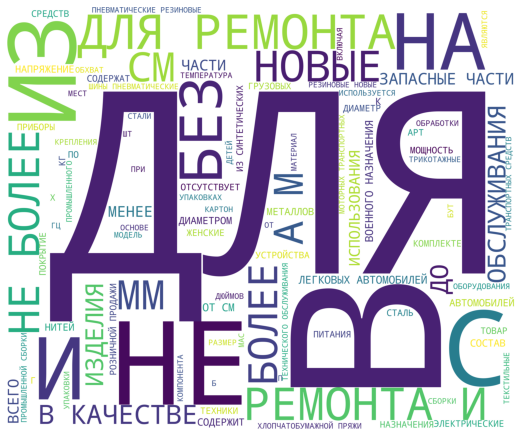

In [30]:

# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=100,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

corpus = get_corpus(df['OPISANIE'].sample(n = 100).values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [35]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
russian_stopwords = stopwords.words("russian")

# Удаление знаков пунктуации из текста
def remove_punct(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

df['OPISANIE_CLEAN'] = df['OPISANIE'].map(lambda x: x.lower())
df['OPISANIE_CLEAN'] = df['OPISANIE_CLEAN'].map(lambda x: remove_punct(x))
df['OPISANIE_CLEAN'] = df['OPISANIE_CLEAN'].map(lambda x: x.split(' '))
df['OPISANIE_CLEAN'] = df['OPISANIE_CLEAN'].map(lambda x: [token for token in x if token not in russian_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
df['OPISANIE_CLEAN'] = df['OPISANIE_CLEAN'].map(lambda x: ' '.join(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasiliev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<AxesSubplot:>

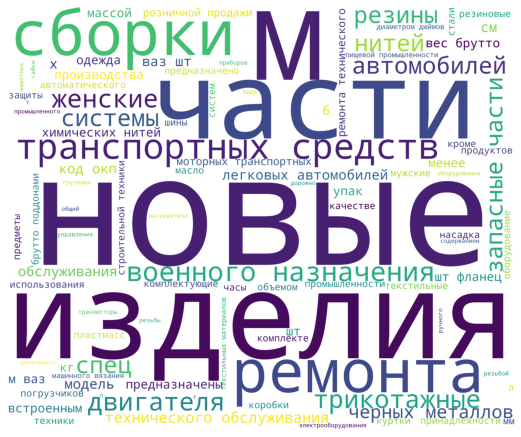

In [36]:
corpus = get_corpus(df['OPISANIE_CLEAN'].sample(n = 100).values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [55]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    t = df.groupby('TNVED')
    t.describe()

In [58]:
t.describe()

OPISANIE                                                                 \
         count unique                                                top freq   
TNVED                                                                           
101        117    100  ЛОШАДЬ ЖИВАЯ ПЛЕМЕННАЯ ЧИСТОКРОВНОЙ ПОРОДЫ (ЧИ...    7   
102        130     84  ДОМАШНИЙ КРУПНЫЙ СКОТ:КРУПНЫЙ РОГАТЫЙ СКОТ ( Б...    8   
103         63     40  СВИНЬИ ЖИВЫЕ ДОМАШНИЕ, МАССОЙ 100 КГ +/-10 %, ...   13   
104         25     14  МЛЕКОПИТАЮЩИЕ ЖИВОТНЫЕ ЖИВЫЕ ИЗ РОДА БАРАНОВ(О...    5   
105         40     28  ЦЫПЛЯТА ПРАРОДИТЕЛЬСКИХ И МАТЕРИНСКИХ ЛИНИЙ ПЛ...    5   
...        ...    ...                                                ...  ...   
9702         1      1  ПРОИЗВЕДЕНИЯ ИСКУССТВА, ПОДЛИННИКИ ГРАВЮР, ЭСТ...    1   
9703        25     24  ПОДЛИННИКИ СКУЛЬПТУР, УПАКОВАНЫ В ИНДИВИДУАЛЬН...    2   
9704         2      2  ГАШЕНЫЕ ПОЧТОВЫЕ МАРКИ (БЛОКИ.МАЛЫЕ ЛИСТЫ) РОС...    1   
9705        49     32  ПРЕДМЕТЫ КОЛЛЕКЦИОНИРОВАНИЯ ПО НУМИЗМАТИКЕ, В ...    6   
9706        60     13  ПРЕДМЕТЫ ДЕКОРАТИВНО-ПРИКЛАДНОГО ИСКУССТВА, ЯВ...   25   

       DATA                         OPISANIE_CLEAN         \
      count unique         top freq          count unique   
TNVED                                                       
101     117     29  21.10.2021   10            117     99   
102     130     44  12.10.2021    8            130     82   
103      63     27  02.09.2021    7             63     40   
104      25     12  18.09.2021    6             25     14   
105      40     26  23.09.2021    4             40     28   
...     ...    ...         ...  ...            ...    ...   
9702      1      1  06.10.2021    1              1      1   
9703     25     17  19.10.2021    4             25     23   
9704      2      2  05.10.2021    1              2      2   
9705     49     20  23.10.2021   10             49     32   
9706     60     13  04.10.2021   25             60     13   

                                                               
                                                     top freq  
TNVED                                                          
101    лошадь живая племенная чистокровной породы чис...    7  
102    домашний крупный скот крупный рогатый скот быч...    8  
103    свиньи живые домашние массой 100 кг 10 предназ...   13  
104    млекопитающие животные живые рода баранов овец...    5  
105    цыплята прародительских материнских линий плем...    5  
...                                                  ...  ...  
9702   произведения искусства подлинники гравюр эстам...    1  
9703   подлинники скульптур упакованы индивидуальные ...    2  
9704   гашеные почтовые марки блоки малые листы росси...    1  
9705   предметы коллекционирования нумизматике капсул...    6  
9706   предметы декоративно прикладного искусства явл...   25  

[1192 rows x 12 columns]

In [62]:
t.count().sort_values(by=['OPISANIE'])

,OPISANIE,DATA,OPISANIE_CLEAN
TNVED,,,
1603,1,1,1
5102,1,1,1
7107,1,1,1
6501,1,1,1
9702,1,1,1
...,...,...,...
8536,86788,86788,86788
4016,87399,87399,87399
3926,106292,106292,106292


In [69]:
t.count().sort_values(by=['OPISANIE']).to_csv('TNVED_count.csv')

In [70]:
df['TNVED2'] = df['TNVED'] // 100
t2 = df.groupby('TNVED2')
t2.count().sort_values(by=['OPISANIE']).to_csv('TNVED2_count.csv')

In [71]:
df.sort_values(by=['DATA'])

,TNVED,OPISANIE,DATA,OPISANIE_CLEAN,TNVED2
277943,2008,"ОРЕХИ ОБЖАРЕННЫЕ, РАСФАСОВАНЫ В ПЕРВИЧНЫХ УПАК...",01.08.2021,орехи обжаренные расфасованы первичных упаковк...,20
831283,2103,"ТОМАТНЫЙ СОУС, НЕ СОДЕРЖИТ ГМО, В ПЛАСТИК.БАНК...",01.08.2021,томатный соус содержит гмо пластик банках 2 23...,21
831284,2103,"СОУС ОВОЩНОЙ, НЕ СОДЕРЖИТ ГМО, В БАНКАХ ПО 0,4...",01.08.2021,соус овощной содержит гмо банках 0 4 кг упак 5...,21
621569,8302,"КРЕПЕЖНАЯ ФУРНИТУРА, ПРИМЕНЯЕМЫЕ ДЛЯ МЕБЕЛИ",01.08.2021,крепежная фурнитура применяемые мебели,83
621570,8504,"ПРЕОБРАЗОВАТЕЛИ СТАТИЧЕСКИЕ, ИСПОЛЬЗУЕМЫЕ С ТЕ...",01.08.2021,преобразователи статические используемые телек...,85
...,...,...,...,...,...
4172526,8538,ЧАСТИ ЗАЖИМОВ КОНТАКТНЫХ ДЛЯ ПРОВОДОВ И КАБЕЛЕ...,31.10.2021,части зажимов контактных проводов кабелей груз...,85
4172527,8507,"АККУМУЛЯТОРЫ ЭЛЕКТРИЧЕСКИЕ,СВИНЦОВЫЕ,ИСПОЛЬЗУЕ...",31.10.2021,аккумуляторы электрические свинцовые используе...,85
4172528,3926,ИЗДЕЛИЯ ИЗ ПЛАСТМАСС ДЛЯ ГРУЗОВЫХ А/М:,31.10.2021,изделия пластмасс грузовых м,39
3953610,6402,"ОБУВЬ ДЛЯ ВЗРОСЛЫХ: БОТИНКИ МУЖСКИЕ, ВЕРХ ИСКУ...",31.10.2021,обувь взрослых ботинки мужские верх искусствен...,64


In [226]:
df[['OPISANIE_CLEAN','TNVED','TNVED2']].to_csv('dataset.csv')

In [75]:
df[['OPISANIE_CLEAN']].sample(n=100).sort_values(by=['OPISANIE_CLEAN']).to_csv('11.csv')

In [122]:
ttt = df[['OPISANIE_CLEAN']].OPISANIE_CLEAN.tolist()
print(len(ttt))

4177899


In [101]:
my_sentence = df[['OPISANIE_CLEAN']].sample(n=1).OPISANIE_CLEAN.tolist()
print(my_sentence)

['видеокарта виде платы электронными компонентами встраиваемая предназначена негласного получения информации']


In [216]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(ttt[:200000])]
model = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=6, epochs=20)

In [217]:
vector = model.infer_vector(['аппаратура электрическая коммутации электрических цепей предназначенная соединения электрических проводников монтажа печатных схемах телекоммуникационного оборудования являются ломом электрооборудования общепромышленного примене'])
print(vector)
vector = model.infer_vector(['видеокарта виде платы электронными компонентами встраиваемая предназначена негласного получения информации'])
print(vector)

[ 2.3517846e-04 -2.7722602e-03  1.8364661e-03  4.8929309e-03
  1.1854548e-03 -5.8116374e-04 -3.7489206e-04  4.0536225e-03
  2.8136021e-03 -2.4025089e-03 -3.8810831e-03 -2.8703595e-03
 -1.0824322e-03 -1.6852411e-03  2.5359446e-03  1.9474333e-03
 -7.7800604e-04 -1.6648561e-04 -1.7488280e-03 -4.2906841e-03
  2.2260696e-03 -3.5393739e-03  7.7044009e-04 -4.1098986e-03
 -3.1824529e-04  4.4507204e-04 -2.0514075e-03 -4.4764006e-03
 -2.3495408e-03  1.7409701e-03  1.3295829e-04 -4.4044555e-04
  8.0374657e-04  2.8359222e-03 -2.4552019e-03 -1.9606792e-03
 -1.9644427e-03  4.8099072e-03  1.8439984e-03 -2.4364998e-03
 -1.2606207e-03  8.5107924e-04 -4.9561989e-03 -8.7445619e-04
  4.3019596e-03 -4.6097022e-03 -1.1938346e-03  2.5740373e-03
  1.0313285e-03 -3.1436349e-03 -5.6300074e-04 -4.5662429e-03
  4.8928619e-03 -2.4566578e-03  1.8487179e-03 -4.1933460e-03
 -1.1615214e-03 -1.9310853e-03  7.5467826e-05  4.5599896e-03
 -2.5339264e-03  4.2348192e-03 -3.3280849e-03 -3.1050306e-03
  4.6267230e-03  2.53942

In [218]:
base = []
for x in ttt[:200000]:
    #print(x)
    base.append(model.infer_vector([x]))
print(len(base))

200000


In [220]:
print(ttt[0])

части принадлежности аппаратуры поз 9025 военного назначения


In [221]:
from scipy import spatial

tree = spatial.KDTree(base)
tree.query(vector)

(0.029535951043623526, 195429)

In [225]:
#input_vec = model.infer_vector(['части принадлежности аппаратуры поз 9025 военного назначения'])
#input_vec = model.infer_vector(['видеокарта виде платы электронными компонентами встраиваемая предназначена негласного получения информации'])
#input_vec = model.infer_vector(['аппаратура электрическая коммутации электрических цепей предназначенная соединения электрических проводников монтажа печатных схемах телекоммуникационного оборудования являются ломом электрооборудования общепромышленного'])
#input_vec = model.infer_vector(['аппаратура электрическая коммутации электрических цепей предназначенная соединения электрических проводников монтажа печатных схемах'])

res = tree.query(input_vec, k=20)

for x in res[1]:
    print(ttt[x])

инструменты обработки металла нарезания внутренней резьбы оснастка станков типа cbf материал рабочей части легированная сталь вольфрамокобальтовый сплав
электрические двигатели постоянного тока выходной м ощностью 37 5 вт предназначены применения электротехнических сборках общепромышленного назначени
шины новые рисунок протектора отличный рисунка елочку транспортных средств используемых строительстве промышленности катал номер 7033 размером 10 16 5 12рr ind35 tl 138 a3 ширина профиля 260мм посадочный диаметр 419мм диаметр шины 7
монолитные интегральные электронные микросхемы микроконтроллеры являются шифровальным криптографическим средством артикул stm32f105rbt6 предназначены установки печатную плату узлов печатных входящих состав приборов безопасности ог
втулка проходная универсальная мягкая вулканизованная непористая резина специально разработано адаптировано внедорожных большегрузных транспортных средств дорожно строительной техники
реагенты проведения лабораторных исследований in v